## Text Classification using Classic ML Models
Kaggle dataset: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

## Import Kaggle Dataset

In [1]:
import os
import zipfile
import pandas as pd
from utils.config.constants import str_config, str_utils, str_data, str_images

config_path = f'{str_utils}/{str_config}'
data_path = f'{str_utils}/{str_data}'
images_path = f'{str_utils}/{str_images}'

# Establecer variable de entorno para Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = config_path

# Descargar el dataset desde Kaggle
os.system(f"kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis -p {data_path}")


# Descomprimir el archivo ZIP descargado
with zipfile.ZipFile(f"{data_path}/twitter-entity-sentiment-analysis.zip", "r") as zip_ref:
    zip_ref.extractall(data_path)

# Cargar CSV en un DataFrame de pandas
df_train = pd.read_csv(f"{data_path}/twitter_training.csv", header=None)
df_val = pd.read_csv(f"{data_path}/twitter_validation.csv", header=None)


In [41]:
# vemos que no tienen emcabezados
#df_train.head()
df_val.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [2]:
# agregamos las columnas a los datos
df_train.columns = ['Tweet ID', 'entity','sentiment','Tweet content']
df_val.columns  = ['Tweet ID', 'entity','sentiment','Tweet content']

In [3]:
df_val

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df_train

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
# vemos la forma de la data para ver cuantas hay en cada set de datos
print(df_train.shape)
print(df_val.shape)

(74682, 4)
(1000, 4)


## Data Preprocessing

In [6]:
# Funcion para limpiar texto:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñ\s]', '', texto)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return ' '.join(palabras)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevinha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
stop_words, len(stop_words)

({'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'mys

In [8]:
#Limpiamos texto
df_train['Clean Tweet content'] = df_train['Tweet content'].apply(limpiar_texto)
df_val['Clean Tweet content'] = df_val['Tweet content'].apply(limpiar_texto)

In [9]:
df_train

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [10]:
df_val

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


### Add word count column, before and after cleaning

In [11]:
# Train set
df_train['Word Count'] = df_train['Tweet content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df_train['Clean Word Count'] = df_train['Clean Tweet content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Validation set
df_val['Word Count'] = df_val['Tweet content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df_val['Clean Word Count'] = df_val['Clean Tweet content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

In [12]:
df_train.head(5)

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content,Word Count,Clean Word Count
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,11,4
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,12,3
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,10,4
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,10,4
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,12,4


In [13]:
df_val.head(5)

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content,Word Count,Clean Word Count
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...,47,22
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,16,14
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,17,7
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,13,8
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,25,12


## Data Visualization


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_count_distribution(df, y_column, save_fig=False):

    # Agrupación de Sentimientos por Entidad
    sentiment_by_entity = df.groupby(['entity', y_column]).size().unstack(fill_value=0)

    # Calcular el conteo total por entidad
    total_counts = sentiment_by_entity.sum(axis=1)

    # Tamaño razonable
    plt.figure(figsize=(15, 8))

    # Gráfica
    ax = sentiment_by_entity.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Distribución de Sentimientos por Entidad')
    plt.xlabel('Entidad')
    plt.ylabel('Cantidad de Tweets')
    plt.xticks(rotation=90)
    plt.legend(title=y_column)

    # Añadir etiquetas de conteo total encima de cada barra
    for i, total in enumerate(total_counts):
        ax.text(i, total + max(total_counts) * 0.01, str(total), ha='center', va='bottom', fontsize=9)


    if save_fig:
        plt.savefig(f'{images_path}/sentiment_by_entity.png', dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()
    
    print(sentiment_by_entity)

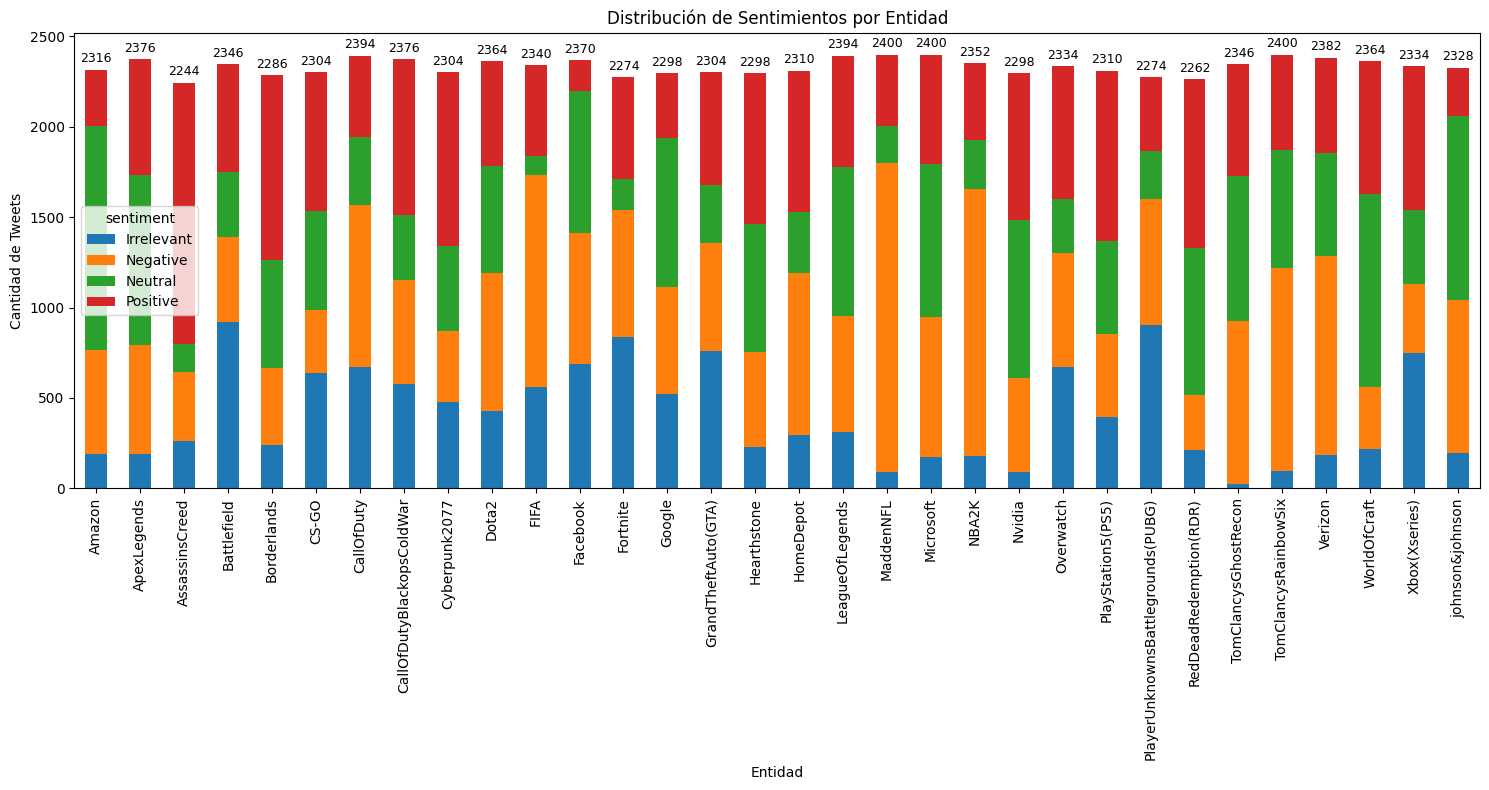

sentiment                          Irrelevant  Negative  Neutral  Positive
entity                                                                    
Amazon                                    192       576     1236       312
ApexLegends                               192       600      942       642
AssassinsCreed                            264       378      156      1446
Battlefield                               918       474      360       594
Borderlands                               240       426      600      1020
CS-GO                                     636       348      552       768
CallOfDuty                                672       894      378       450
CallOfDutyBlackopsColdWar                 576       576      360       864
Cyberpunk2077                             480       390      468       966
Dota2                                     426       768      588       582
FIFA                                      558      1176      102       504
Facebook                 

In [84]:
plot_word_count_distribution(df_train, y_column='sentiment', save_fig=True)

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_word_count_distribution_pie(df, y_column,save_fig=False):

    # Conteo por sentimiento
    sentiment_counts = df[y_column].value_counts()

    # Obtener etiquetas únicas
    labels = sentiment_counts.index.tolist()
    num_labels = len(labels)

    # Generar una paleta de colores dinámica (usamos 'tab10', pero puedes cambiarla)
    cmap = cm.get_cmap('viridis', num_labels)
    colors = [cmap(i) for i in range(num_labels)]

    # Crear figura con 1 fila y 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de barras
    sentiment_counts.plot(kind='bar', color=colors, ax=axes[0])
    axes[0].set_title('Cantidad de Tweets por Sentimiento')
    axes[0].set_xlabel(y_column)
    axes[0].set_ylabel('Cantidad')
    axes[0].tick_params(axis='x', rotation=0)

    # Gráfico de pastel
    sentiment_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', ax=axes[1])
    axes[1].set_title('Proporción de Tweets por Sentimiento')
    axes[1].set_ylabel('')  # Eliminar etiqueta innecesaria
    if save_fig:
        plt.savefig(f'{images_path}/image_1.png', dpi=300, bbox_inches='tight')
    # Ajustar diseño
    plt.tight_layout()
    plt.show()

C:\Users\kevinha\AppData\Local\Temp\ipykernel_90720\2234291307.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_labels)


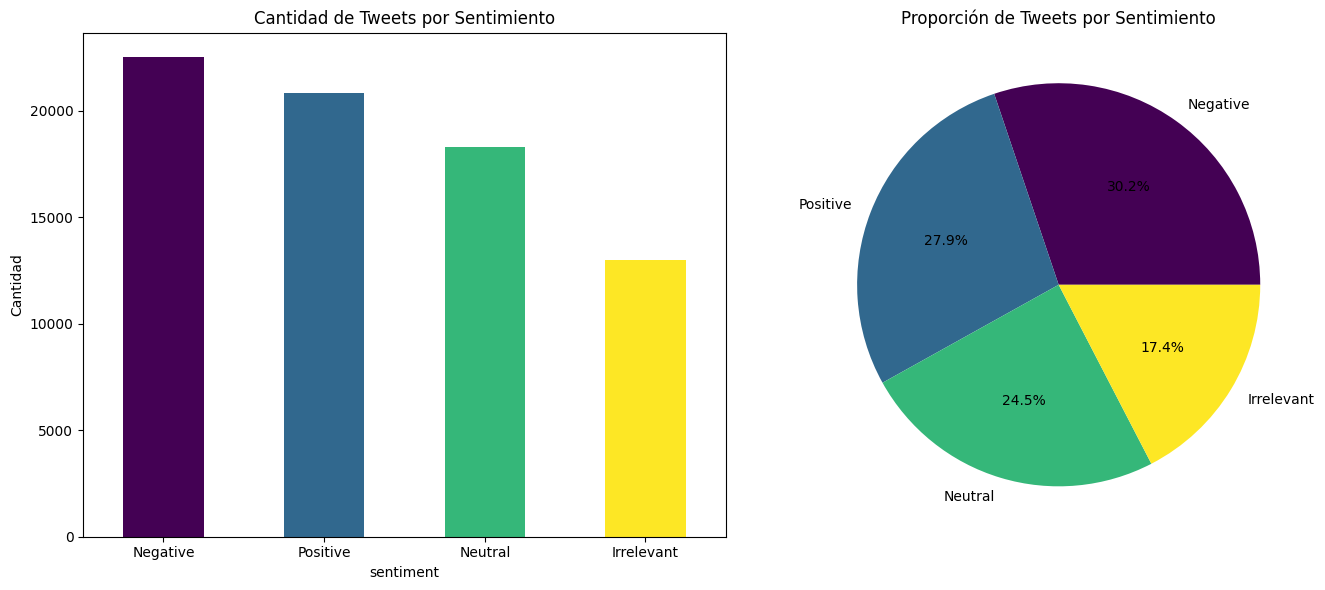

In [73]:
plot_word_count_distribution_pie(df_train, y_column='sentiment',save_fig=True)

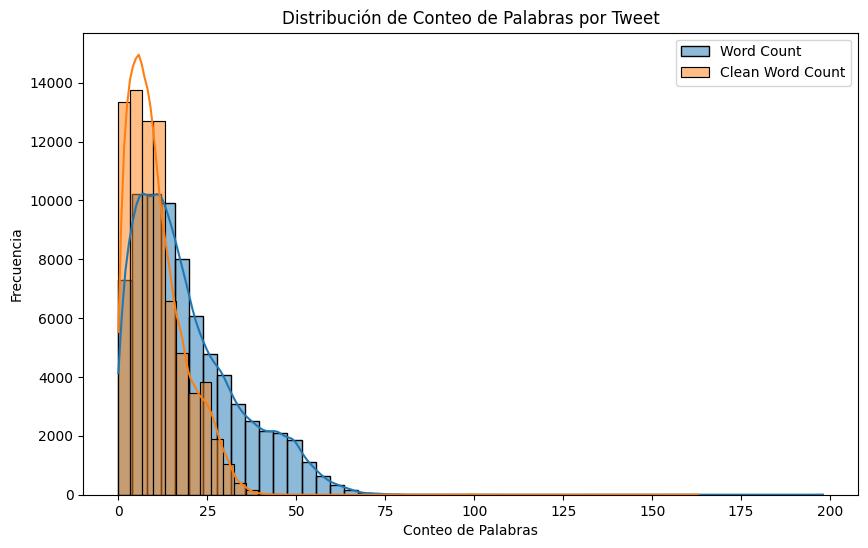

In [77]:
# Plot his for Word Count and Clean Word Count with seaborn in same chart, use alpha 0.5
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_train['Word Count'], bins=50, alpha=0.5, label='Word Count', kde=True)
sns.histplot(df_train['Clean Word Count'], bins=50, alpha=0.5, label='Clean Word Count', kde=True)
plt.title('Distribución de Conteo de Palabras por Tweet')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(f'{images_path}/image_2.png', dpi=300, bbox_inches='tight')
plt.show()


In [19]:
from collections import Counter

# Función para contar palabras únicas
def contar_palabras_por_sentimiento(df, columna_texto, columna_sentimiento):
    # Conteo general
    conteo_general = Counter(" ".join(df[columna_texto].astype(str)).split())
    
    # Conteo por sentimiento
    conteo_por_sentimiento = {}
    for sentimiento in df[columna_sentimiento].unique():
        textos = df[df[columna_sentimiento] == sentimiento][columna_texto].astype(str)
        conteo_por_sentimiento[sentimiento] = Counter(" ".join(textos).split())

    # Mostrar resultados
    print("Conteo General de Palabras:")
    print(conteo_general.most_common(10))  # Mostrar las 10 palabras más comunes

    print("\nConteo de Palabras por Sentimiento:")
    for sentimiento, conteo in conteo_por_sentimiento.items():
        print(f"\nSentimiento: {sentimiento}")
        print(conteo.most_common(10))  # Mostrar las 10 palabras más comunes por sentimiento

    return conteo_general, conteo_por_sentimiento

In [90]:
def plot_top_words(conteo_general, conteo_por_sentimiento, title,save_fig=False):
    # Crear figura y ejes (2 filas, 3 columnas)
    fig, axes = plt.subplots(2, 3, figsize=(16, 6))
    plt.subplots_adjust(hspace=0.4)  # espacio vertical entre subplots

    # Título general del gráfico
    fig.suptitle(title, fontsize=16, y=1.02)

    # Gráfico general (fila 1, columna 1)
    palabras, conteos = zip(*conteo_general.most_common(10))
    sns.barplot(x=list(conteos), y=list(palabras), palette="viridis", ax=axes[0, 0], hue=list(palabras))
    axes[0, 0].set_title("Top 10 Palabras Más Comunes (General)")
    axes[0, 0].set_xlabel("Frecuencia")
    axes[0, 0].set_ylabel("Palabras")

    # Gráfico general (fila 2, columna 1)
    palabras, conteos = zip(*conteo_general.most_common()[-10:])
    sns.barplot(x=list(conteos), y=list(palabras), palette="viridis", ax=axes[1, 0], hue=list(palabras))
    axes[1, 0].set_title("Lowest 10 Palabras Más Comunes (General)")
    axes[1, 0].set_xlabel("Frecuencia")
    axes[1, 0].set_ylabel("Palabras")

    # Gráficos por sentimiento (en las columnas 2 y 3)
    sentimientos = list(conteo_por_sentimiento.keys())

    for i, sentimiento in enumerate(sentimientos):
        col = 1 + i // 2  # col 1 → col 2 o 3
        row = i % 2       # row 0 o 1
        palabras, conteos = zip(*conteo_por_sentimiento[sentimiento].most_common(10))
        sns.barplot(x=list(conteos), y=list(palabras), palette="viridis", ax=axes[row, col], hue=list(palabras))
        axes[row, col].set_title(f"Top 10 Palabras Más Comunes ({sentimiento})")
        axes[row, col].set_xlabel("Frecuencia")
        axes[row, col].set_ylabel("Palabras")

    plt.tight_layout()
    if save_fig:
        plt.savefig(f'{images_path}/image_4.png', dpi=300, bbox_inches='tight')
    plt.show()

Conteo General de Palabras:
[('the', 38246), ('to', 27711), ('I', 25185), ('and', 24653), ('a', 21851), ('of', 18627), ('is', 16473), ('for', 14714), ('/', 14655), ('in', 14088)]

Conteo de Palabras por Sentimiento:

Sentimiento: Positive
[('the', 10163), ('I', 8011), ('to', 7501), ('and', 6459), ('a', 5480), ('of', 4962), ('is', 4190), ('for', 4156), ('in', 3525), ('this', 2969)]

Sentimiento: Neutral
[('the', 8731), ('/', 7493), ('to', 6776), ('and', 5892), ('a', 5267), ('I', 4774), ('of', 4710), ('for', 3748), ('.', 3719), ('in', 3596)]

Sentimiento: Negative
[('the', 12493), ('to', 8685), ('I', 8632), ('and', 7967), ('a', 7049), ('is', 6317), ('of', 5472), ('@', 4650), ('in', 4380), ('for', 4028)]

Sentimiento: Irrelevant
[('the', 6859), ('to', 4749), ('and', 4335), ('a', 4055), ('I', 3768), ('of', 3483), ('is', 2911), ('for', 2782), ('in', 2587), ('/', 2542)]
Conteo General de Palabras:
[('game', 8066), ('im', 4942), ('like', 4882), ('get', 3941), ('one', 3584), ('good', 3552), ('

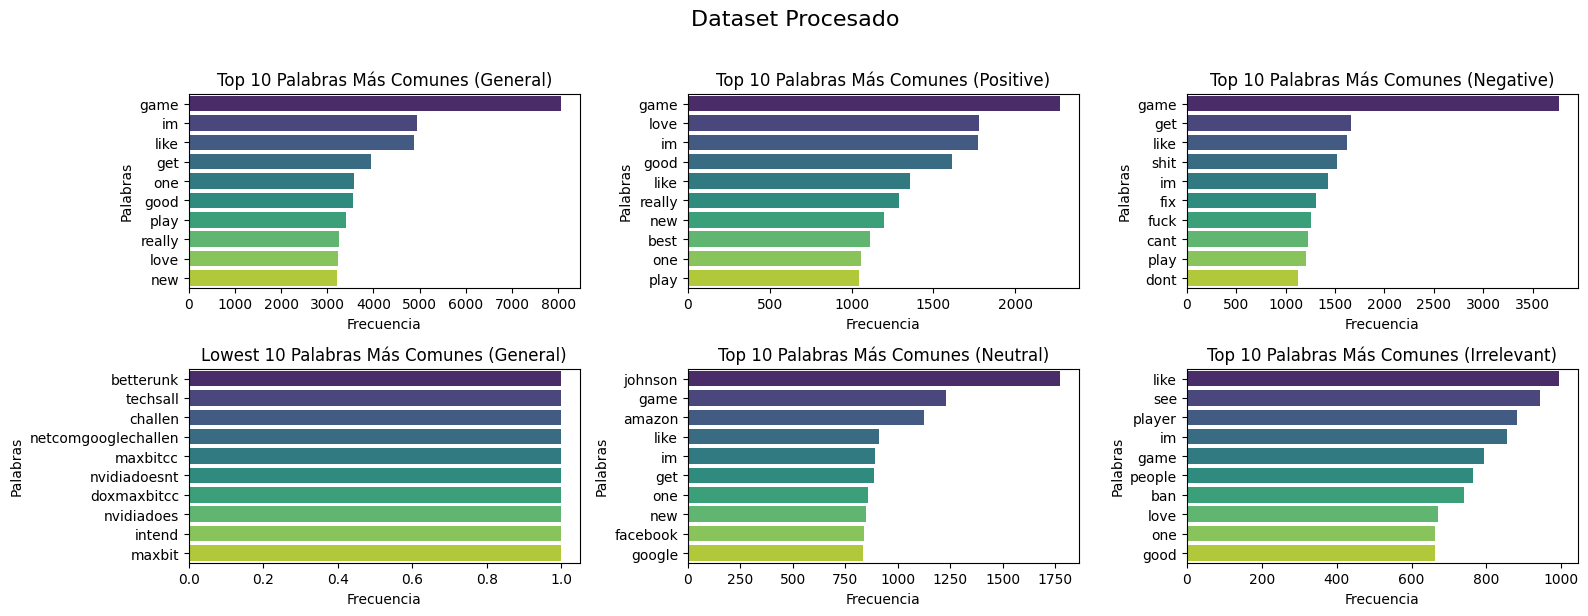

In [91]:
# Aplicar la función
conteo_general, conteo_por_sentimiento = contar_palabras_por_sentimiento(df_train, 'Tweet content', 'sentiment')
conteo_general_clean, conteo_por_sentimiento_clean = contar_palabras_por_sentimiento(df_train, 'Clean Tweet content', 'sentiment')
#plot_top_words(conteo_general, conteo_por_sentimiento, title='Dataset sin Procesar',save_fig=True)
plot_top_words(conteo_general_clean, conteo_por_sentimiento_clean, title='Dataset Procesado',save_fig=True)

In [96]:
def plot_cum_freq(conteo_general, lim_porcentaje=0.9):
    # Obtener frecuencias ordenadas (de mayor a menor)
    frecuencias = np.array(sorted(conteo_general.values(), reverse=True))
    frecuencia_total = frecuencias.sum()
    frecuencia_acumulada = np.cumsum(frecuencias)
    porcentaje_acumulado = frecuencia_acumulada / frecuencia_total

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(porcentaje_acumulado)
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% cobertura')
    plt.title('Cobertura Acumulada de Frecuencia de Palabras')
    plt.xlabel('Número de palabras (ordenadas por frecuencia)')
    plt.ylabel('% de cobertura acumulada')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{images_path}/image_6.png', dpi=300, bbox_inches='tight')
    plt.show()

    num_palabras = np.argmax(porcentaje_acumulado >= lim_porcentaje)
    print(f"Número de palabras para 90% de cobertura: {num_palabras}")
    
    return num_palabras

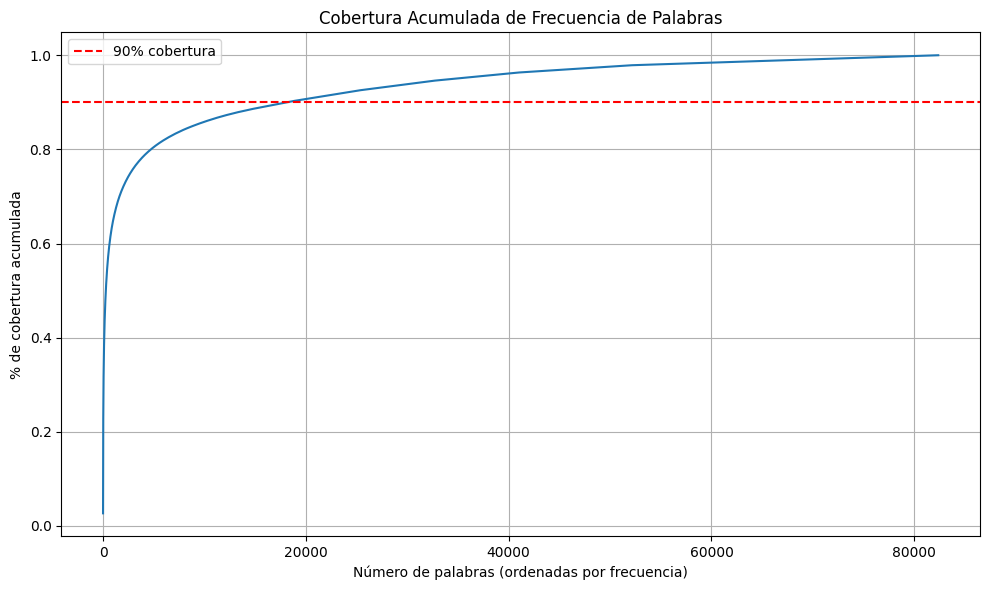

Número de palabras para 90% de cobertura: 18089


np.int64(18089)

In [95]:
max_features_original = plot_cum_freq(conteo_general, lim_porcentaje=0.9)
max_features_original

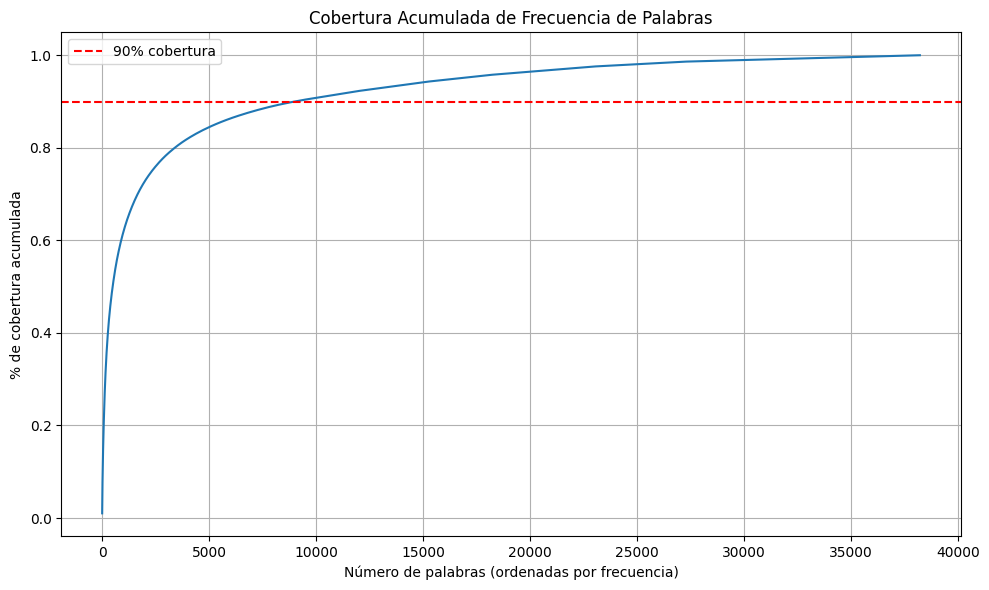

Número de palabras para 90% de cobertura: 8999


np.int64(8999)

In [97]:
max_features_clean = plot_cum_freq(conteo_general_clean, lim_porcentaje=0.9)

max_features_clean

In [24]:
# Min, Max y Avg de Word Count y Clean Word Count en formato dataframe
import pandas as pd

# Crear un DataFrame con los resultados
stats_df = pd.DataFrame({
    'Metric': ['Min', 'Max', 'Avg'],
    'Word Count': [df_train['Word Count'].min(), df_train['Word Count'].max(), df_train['Word Count'].mean()],
    'Clean Word Count': [df_train['Clean Word Count'].min(), df_train['Clean Word Count'].max(), df_train['Clean Word Count'].mean()]
})

# Mostrar el DataFrame
stats_df

,Metric,Word Count,Clean Word Count
0,Min,0.000000,0.000000
1,Max,198.000000,163.000000
2,Avg,19.050012,10.650706


## Modelos Clasicos de ML para clasificacion de texto

### Split dataset

In [25]:
# Separate features (X) and target variable (y).  Replace 'target_column' with the actual name of your target column.
y_column = 'sentiment'
X_train = df_train.drop(y_column, axis=1)
Y_train = df_train[y_column]

X_val = df_val.drop(y_column, axis=1)
Y_val = df_val[y_column]

In [26]:
X_train

,Tweet ID,entity,Tweet content,Clean Tweet content,Word Count,Clean Word Count
0,2401,Borderlands,im getting on borderlands and i will murder yo...,im getting borderlands murder,11,4
1,2401,Borderlands,I am coming to the borders and I will kill you...,coming borders kill,12,3
2,2401,Borderlands,im getting on borderlands and i will kill you ...,im getting borderlands kill,10,4
3,2401,Borderlands,im coming on borderlands and i will murder you...,im coming borderlands murder,10,4
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,12,4
...,...,...,...,...,...,...
74677,9200,Nvidia,Just realized that the Windows partition of my...,realized windows partition mac like years behi...,26,11
74678,9200,Nvidia,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...,23,11
74679,9200,Nvidia,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...,25,11
74680,9200,Nvidia,Just realized between the windows partition of...,realized windows partition mac like years behi...,32,14


In [27]:
Y_train

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: sentiment, Length: 74682, dtype: object

### Baseline Model - TF-IDF - Naive Bayes

In [28]:
def plot_conf_matrix(cm, labels):
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    """
    Plots a confusion matrix using seaborn heatmap.
    """
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [29]:
# Define parameters for the model
# y_column = 'sentiment'
x_column = 'Clean Tweet content'
max_features = max_features_clean
n_grams = 2

In [ ]:
# Paso completo: vectorización TF-IDF + entrenamiento y evaluación con Naive Bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_baseline_model(X_train, Y_train, X_val, Y_val, x_column, max_features, n_grams, plot=True):
    # Vectorización TF-IDF
    vectorizer = TfidfVectorizer(
        max_features=max_features,        # limitar a 500 características (palabras/ngramas)
        ngram_range=(1, n_grams),      # usar unigramas, bigramas y trigramas
        stop_words='english'     # eliminar palabras vacías en inglés
    )

    # Ajustar y transformar los datos de entrenamiento
    X_train_vec = vectorizer.fit_transform(X_train[x_column])

    # Transformar los datos de validación con el mismo vectorizador
    X_val_vec = vectorizer.transform(X_val[x_column])

    # Entrenamiento con Multinomial Naive Bayes
    modelo_nb = MultinomialNB(alpha=0.1)
    modelo_nb.fit(X_train_vec, Y_train)

    # Predicción y evaluación
    y_pred_nb = modelo_nb.predict(X_val_vec)

    # Crear la matriz de confusión
    cm = confusion_matrix(Y_val, y_pred_nb)
    cr = classification_report(Y_val, y_pred_nb)

    print("===== Multinomial Naive Bayes =====")
    print(cr)
    print("Matriz de confusión:")
    print(cm)

    if plot:
        plot_conf_matrix(cm, modelo_nb.classes_)
    
    return modelo_nb, cm

In [31]:
# train_and_evaluate_baseline_model(X_train, Y_train, X_val, Y_val, x_column, max_features, n_grams=1, plot=False)

===== Multinomial Naive Bayes =====
              precision    recall  f1-score   support

  Irrelevant       0.85      0.70      0.76       172
    Negative       0.71      0.88      0.79       266
     Neutral       0.86      0.68      0.76       285
    Positive       0.77      0.85      0.81       277

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000

Matriz de confusión:
[[120  22  10  20]
 [  2 233  10  21]
 [ 12  49 194  30]
 [  8  22  11 236]]


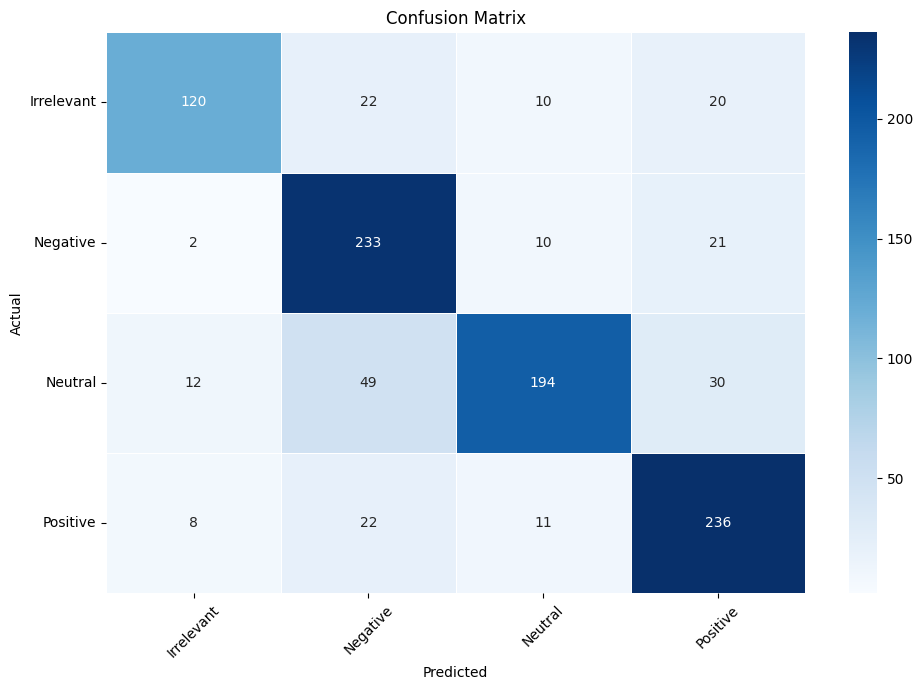

(MultinomialNB(alpha=0.1),
 array([[120,  22,  10,  20],
        [  2, 233,  10,  21],
        [ 12,  49, 194,  30],
        [  8,  22,  11, 236]]))

In [32]:
train_and_evaluate_baseline_model(X_train, Y_train, X_val, Y_val, x_column, max_features, n_grams, plot=True)

### Múltiples modelos ML

In [33]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def vectorizar_texto(textos, metodo='tfidf', modelo_preentrenado=None, **kwargs):
    """
    Vectoriza una lista de textos usando distintos métodos.

    Parámetros:
    -----------
    textos : list or pd.Series
        Lista de textos limpios a vectorizar.

    metodo : str
        Método de vectorización a usar. Opciones disponibles:
        - 'tfidf': Usa TF-IDF con sklearn (requiere kwargs como max_features, ngram_range, etc.)
        - 'bow': Bag of Words con CountVectorizer
        - 'word2vec': Promedia los vectores de palabras usando modelo_preentrenado (Word2Vec, GloVe, etc.)
        - 'bert': Usa SentenceTransformer para codificar textos completos (modelo_preentrenado debe ser un modelo compatible)

    modelo_preentrenado : modelo opcional
        Modelo requerido para 'word2vec' o 'bert'. Por ejemplo:
        - Para word2vec: modelo de gensim (`api.load(...)`)
        - Para bert: modelo de SentenceTransformer (`SentenceTransformer(...)`)

    kwargs : argumentos opcionales
        Parámetros extra para los vectorizadores sklearn (e.g., max_features, stop_words, etc.)

    Retorna:
    --------
    - Matriz numpy o sparse matrix con las representaciones vectoriales.
    - Objeto del vectorizador o None (si usas embeddings).

    Ejemplo de uso:
    ---------------
    X_vec, vectorizer = vectorizar_texto(textos, metodo='tfidf', max_features=500)
    X_vec, _ = vectorizar_texto(textos, metodo='word2vec', modelo_preentrenado=word2vec_model)

    """
    if metodo == 'tfidf':
        vectorizer = TfidfVectorizer(**kwargs)
        X_vec = vectorizer.fit_transform(textos)
        return X_vec, vectorizer

    elif metodo == 'bow':
        vectorizer = CountVectorizer(**kwargs)
        X_vec = vectorizer.fit_transform(textos)
        return X_vec, vectorizer

    elif metodo == 'word2vec':
        if modelo_preentrenado is None:
            raise ValueError("Debes proporcionar un modelo preentrenado para word2vec.")
        def promediar_vectores(doc):
            palabras = doc.split()
            vectores = [modelo_preentrenado[w] for w in palabras if w in modelo_preentrenado]
            return np.mean(vectores, axis=0) if vectores else np.zeros(modelo_preentrenado.vector_size)
        X_vec = np.array([promediar_vectores(doc) for doc in textos])
        return X_vec, None

    # elif metodo == 'bert':
    #     if modelo_preentrenado is None:
    #         raise ValueError("Debes proporcionar un modelo de SentenceTransformer para BERT.")
    #     X_vec = modelo_preentrenado.encode(textos, show_progress_bar=True)
    #     return X_vec, None

    else:
        raise ValueError("Método no soportado. Usa 'tfidf', 'bow', 'word2vec'.") # o 'bert'


In [34]:
#vectorizamos todos los textos, con untotal de max_features y hasta con n_grams pal diccionario
max_features = max_features_clean
x_column = 'Clean Tweet content'
vectorizer_method = 'tfidf'

X_train_vec, vectorizer = vectorizar_texto(X_train[x_column], metodo=vectorizer_method, max_features=max_features, ngram_range=(1, n_grams), stop_words='english')

In [35]:
# vemos las palabraS O NGRAM QUE MAS PESON TUVIERON EN EL tfidf
vectorizer.get_feature_names_out(), len(vectorizer.get_feature_names_out())

(array(['aa', 'aa aa', 'aaa', ..., 'zonestreamcx', 'zoom', 'zuckerberg'],
       shape=(8999,), dtype=object),
 8999)

In [36]:
# for item in vectorizer.get_feature_names_out():
#     print(item)

In [37]:
# ESTE ES EL DICCIONARIO QUE NOS DICE QUE COLUMNA LE TOCA A CADA PALABRA:Te permite entender qué columna corresponde a qué palabra en la matriz dispersa (X) que usas como entrada para modelos de machine learning.
for palabra in sorted(vectorizer.vocabulary_):
    print(f"{palabra}: {vectorizer.vocabulary_[palabra]}")

# TODAS SIN ORDEN : vectorizer.vocabulary_


aa: 0
aa aa: 1
aaa: 2
aaron: 3
ab: 4
abandon: 5
abandon sanction: 6
abandoned: 7
abc: 8
abilities: 9
ability: 10
able: 11
able load: 12
able play: 13
able stream: 14
absolute: 15
absolute best: 16
absolutely: 17
absolutely amazing: 18
absolutely incredible: 19
absolutely love: 20
absolutely worth: 21
absurd: 22
abt: 23
abuse: 24
abused: 25
abusers: 26
abusing: 27
abusive: 28
abysmal: 29
ac: 30
ac rogue: 31
ac valhalla: 32
academy: 33
acc: 34
accent: 35
accept: 36
acceptable: 37
accepted: 38
access: 39
access health: 40
accessibility: 41
accessible: 42
accident: 43
accidental: 44
accidentally: 45
accomplished: 46
according: 47
account: 48
account banned: 49
account got: 50
account hacked: 51
account invalid: 52
accountable: 53
accounts: 54
accurate: 55
accused: 56
accuses: 57
ace: 58
acer: 59
achieve: 60
achieved: 61
achievement: 62
achievements: 63
achievements assassins: 64
achievements red: 65
acquire: 66
acquired: 67
acquisition: 68
act: 69
act like: 70
acted: 71
acting: 72
acting l

In [38]:
print(X_train_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 657671 stored elements and shape (74682, 8999)>
  Coords	Values
  (0, 3935)	0.27926874416037206
  (0, 3194)	0.37280155361710854
  (0, 822)	0.36000208887447366
  (0, 5224)	0.5820294709528828
  (0, 3958)	0.5609529045330647
  (1, 1356)	0.698130386988406
  (1, 4347)	0.7159706437860552
  (2, 3935)	0.29965804642541
  (2, 3194)	0.40001964987928795
  (2, 822)	0.3862857011998527
  (2, 3958)	0.6019078576602489
  (2, 4347)	0.48854848567808135
  (3, 3935)	0.32388859379550694
  (3, 822)	0.41752101789822804
  (3, 5224)	0.6750225753377446
  (3, 1356)	0.5148950390194058
  (4, 3935)	0.27926874416037206
  (4, 3194)	0.37280155361710854
  (4, 822)	0.36000208887447366
  (4, 5224)	0.5820294709528828
  (4, 3958)	0.5609529045330647
  (5, 3935)	0.27926874416037206
  (5, 3194)	0.37280155361710854
  (5, 822)	0.36000208887447366
  (5, 5224)	0.5820294709528828
  :	:
  (74679, 1900)	0.37538225033111694
  (74679, 5468)	0.39196860112123055
  (74680, 4560)	

In [39]:
import pandas as pd

# Convertir matriz dispersa a DataFrame
df_vect = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())
df_vect


,aa,aa aa,aaa,aaron,ab,abandon,abandon sanction,abandoned,abc,abilities,...,zero,zero dawn,zip,zoe,zombie,zombies,zone,zonestreamcx,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


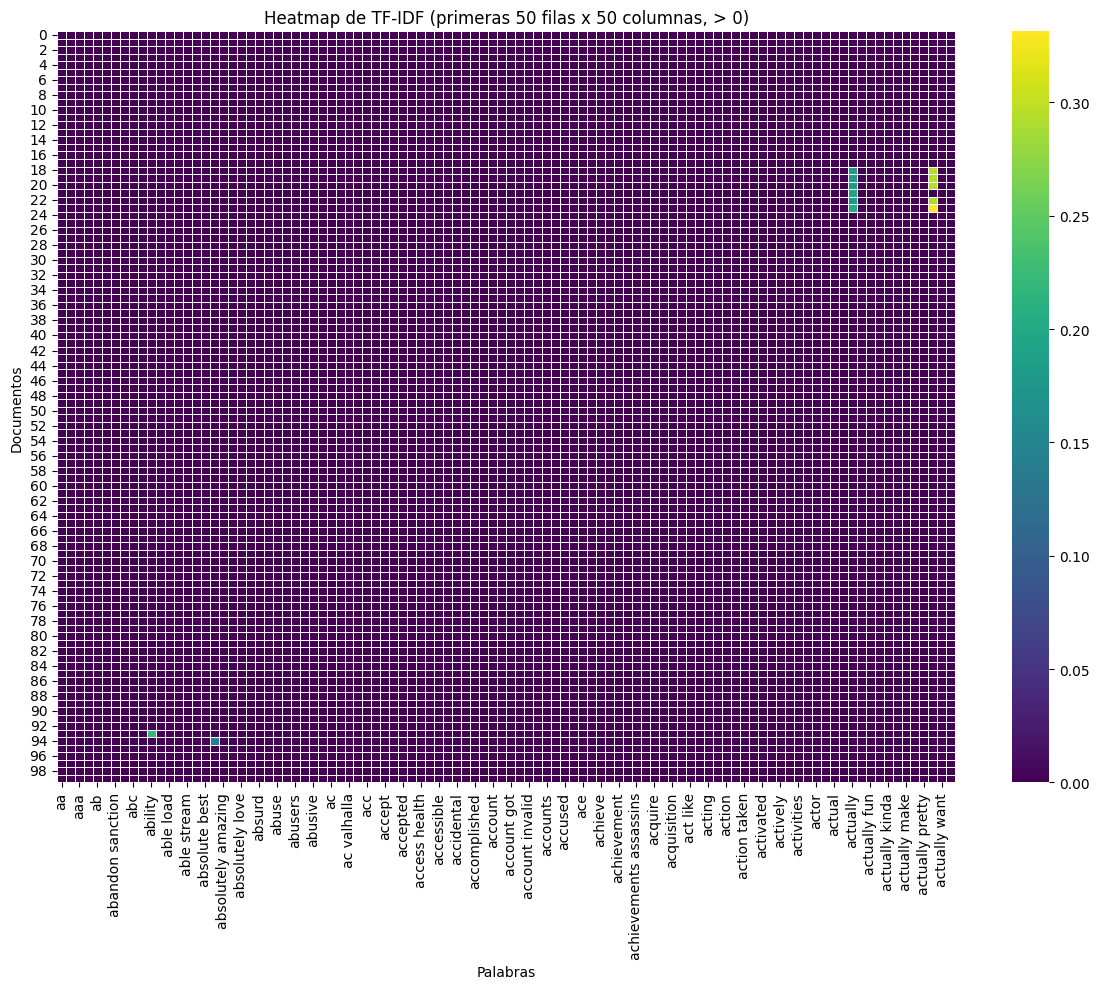

In [40]:
# Filtrar primeras 50 filas y 50 columnas
df_sub = df_vect.iloc[:100, :100]

# Graficar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_sub, cmap="viridis", cbar=True, linewidths=0.5)
plt.title("Heatmap de TF-IDF (primeras 50 filas x 50 columnas, > 0)")
plt.xlabel("Palabras")
plt.ylabel("Documentos")
plt.tight_layout()
plt.show()


In [41]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def train_and_evaluate(modelo, X_train_vec, y_train, X_val_vec, y_val, model_name="Modelo"):
    """
    Entrena y evalúa un modelo clásico de clasificación sobre datos previamente vectorizados.

    Parámetros:
    -----------
    modelo : objeto sklearn
        Instancia del clasificador que se desea entrenar.
    X_train_vec : array-like o matriz dispersa
        Conjunto de entrenamiento ya vectorizado (TF-IDF, BoW, Word2Vec, BERT, etc.).
    y_train : array-like
        Etiquetas del conjunto de entrenamiento.
    X_val_vec : array-like o matriz dispersa
        Conjunto de validación ya vectorizado.
    y_val : array-like
        Etiquetas del conjunto de validación.
    model_name : str, opcional
        Nombre del modelo, utilizado para impresión de resultados.

    Retorna:
    --------
    dict
        Diccionario con los siguientes elementos:
        - 'modelo': el modelo entrenado
        - 'report': diccionario con métricas de clasificación (`classification_report`)
        - 'confusion_matrix': matriz de confusión
    """
    modelo.fit(X_train_vec, y_train)
    y_pred = modelo.predict(X_val_vec)

    print(f"===== {model_name} =====")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

    return {
        'modelo': modelo,
        'report': classification_report(y_val, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, y_pred)
    }

def ejecutar_modelos_clasicos(X_train_raw, Y_train, X_val_raw, Y_val, metodo_vector='tfidf', modelo_preentrenado=None, vectorizer_params={}):
    """
    Ejecuta un pipeline de clasificación de texto clásico que incluye:
    1) Vectorización del texto crudo (TF-IDF, BoW, Word2Vec o BERT)
    2) Entrenamiento y evaluación de múltiples modelos clásicos.

    Parámetros:
    -----------
    X_train_raw : list o pandas Series
        Textos crudos del conjunto de entrenamiento.
    Y_train : array-like
        Etiquetas del conjunto de entrenamiento.
    X_val_raw : list o pandas Series
        Textos crudos del conjunto de validación.
    Y_val : array-like
        Etiquetas del conjunto de validación.
    metodo_vector : str
        Método de vectorización. Opciones:
        - 'tfidf': Term Frequency-Inverse Document Frequency
        - 'bow': Bag of Words
        - 'word2vec': vectores semánticos entrenados (necesita modelo_preentrenado)
        - 'bert': embeddings obtenidos desde modelos BERT (requiere modelo_preentrenado)
    modelo_preentrenado : objeto (opcional)
        Modelo requerido para vectorización basada en embeddings:
        - Word2Vec: un modelo de Gensim entrenado previamente
        - BERT: un diccionario con claves 'model' y 'tokenizer' de HuggingFace
    vectorizer_params : dict
        Parámetros adicionales a pasar al vectorizador (ej. ngram_range, max_features, etc.).

    Retorna:
    --------
    modelos_entrenados : dict
        Diccionario con los resultados de cada modelo evaluado.
    vectorizer : objeto
        El vectorizador utilizado para transformar texto crudo en vectores.
    """
    # Paso 1: Vectorización del texto
    X_train_vec, vectorizer = vectorizar_texto(
        X_train_raw.tolist(),
        metodo=metodo_vector,
        modelo_preentrenado=modelo_preentrenado,
        **vectorizer_params
    )

    # Paso 2: Vectorización del conjunto de validación (con el mismo vectorizador)
    X_val_vec = (
        vectorizer.transform(X_val_raw.tolist()) if vectorizer else
        vectorizar_texto(X_val_raw.tolist(), metodo=metodo_vector, modelo_preentrenado=modelo_preentrenado)[0]
    )

    # Paso 3: Definir modelos a evaluar
    modelos = {
        'Naive Bayes': MultinomialNB(alpha=0.1),
        'Complement NB': ComplementNB(alpha=0.1),
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        # 'SVM (Linear)': SVC(kernel='linear', class_weight='balanced'),
        # 'SGD': SGDClassifier(loss='log_loss', max_iter=1000, penalty='l2', alpha=1e-4, random_state=42)
    }

    # Paso 4: Entrenar y evaluar cada modelo
    resultados = {}
    for nombre, modelo in modelos.items():
        resultados[nombre] = train_and_evaluate(
            modelo, X_train_vec, Y_train, X_val_vec, Y_val, model_name=nombre
        )

    return resultados, vectorizer


In [42]:
resultados, vectorizer = ejecutar_modelos_clasicos(
    X_train['Clean Tweet content'], Y_train,
    X_val['Clean Tweet content'], Y_val,
    metodo_vector='tfidf',
    vectorizer_params={
        'max_features': max_features_clean,
        'ngram_range': (1, n_grams),
        'stop_words': 'english'
    }
)

===== Naive Bayes =====
              precision    recall  f1-score   support

  Irrelevant       0.85      0.70      0.76       172
    Negative       0.71      0.88      0.79       266
     Neutral       0.86      0.68      0.76       285
    Positive       0.77      0.85      0.81       277

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000

Confusion Matrix:
 [[120  22  10  20]
 [  2 233  10  21]
 [ 12  49 194  30]
 [  8  22  11 236]]
===== Complement NB =====
              precision    recall  f1-score   support

  Irrelevant       0.73      0.71      0.72       172
    Negative       0.71      0.82      0.76       266
     Neutral       0.83      0.65      0.73       285
    Positive       0.75      0.82      0.78       277

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      

In [43]:
resultados.keys()

dict_keys(['Naive Bayes', 'Complement NB', 'Logistic Regression', 'Random Forest'])

## Models Evaluation

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_models_conf_matrix(resultados, numerical_labels=True):
    """
    Plots confusion matrices for multiple models in a grid layout.

    Parameters:
    -----------
    resultados : dict
        Dictionary containing model names as keys and their respective results (including confusion matrix) as values.

    Returns:
    --------
    None
    """
    items = len(resultados)
    rows = math.ceil(items / 2)
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()

    for i, (model_name, result) in enumerate(resultados.items()):
        cm = result['confusion_matrix']
        labels = result['modelo'].classes_
        
        if numerical_labels:
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
            per_str = ''
        else:
            # Normalizar por fila (realidad)
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            sns.heatmap(cm_normalized * 100, annot=True, fmt='.2f', cmap='Blues', ax=axes[i], cbar=True)
            per_str = ' (%)'
            
        axes[i].set_title(f'Matriz de Confusión{per_str}: {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        axes[i].set_xticklabels(labels, rotation=45)
        axes[i].set_yticklabels(labels, rotation=0)

    # Ocultar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

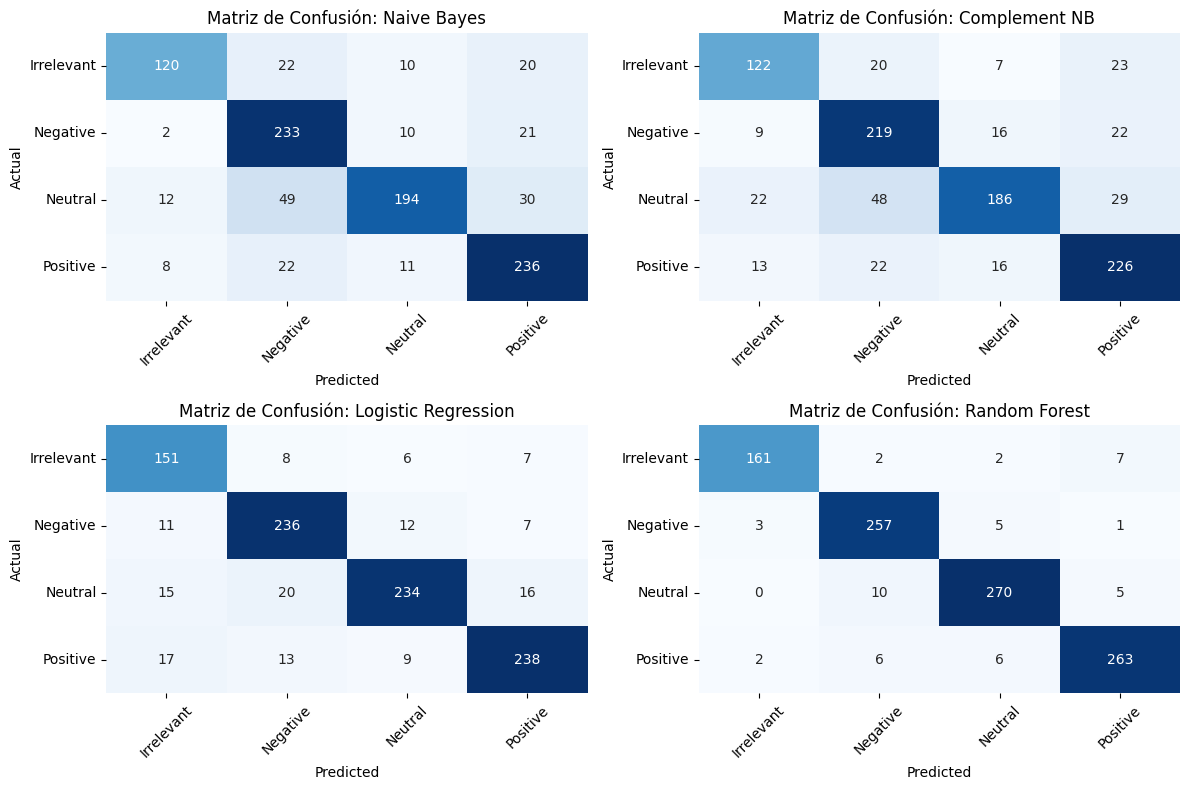

In [45]:
plot_models_conf_matrix(resultados, numerical_labels=True)

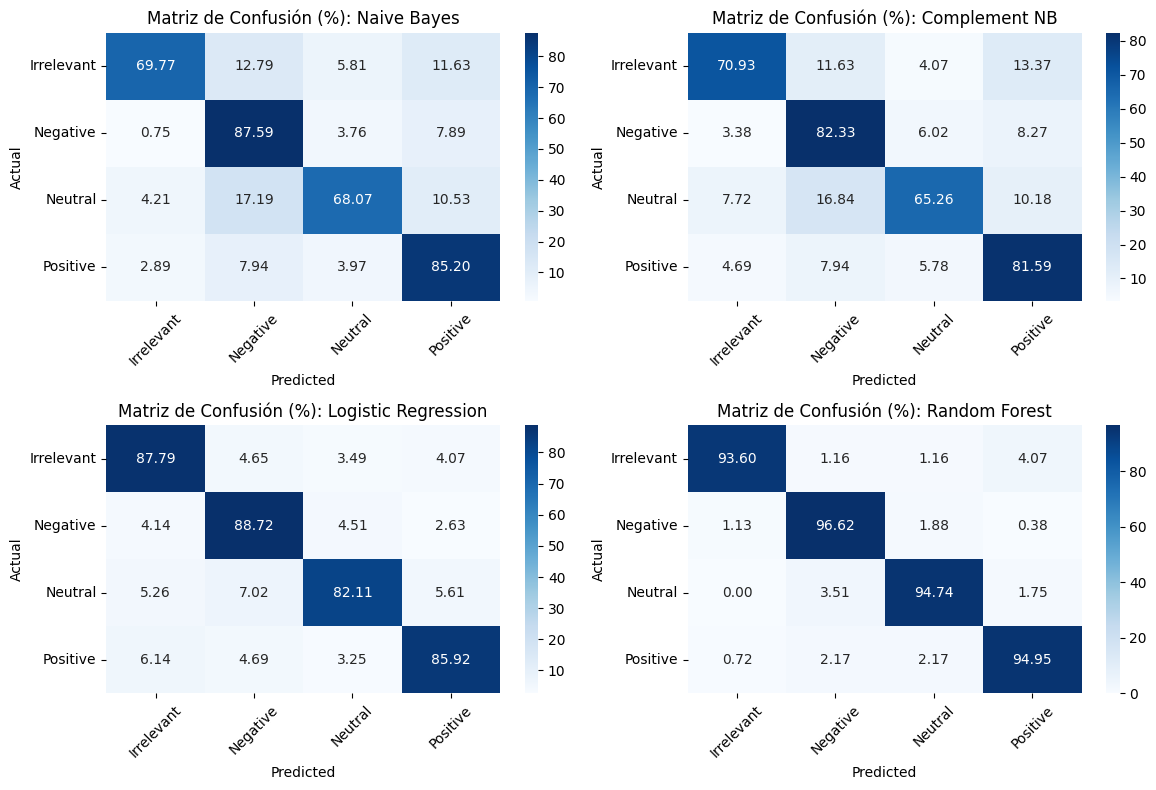

In [46]:
plot_models_conf_matrix(resultados, numerical_labels=False)

In [99]:
def plot_model_metrics(resultados):
    """
    Grafica precision, recall, f1-score y accuracy de cada modelo en barras agrupadas por métrica.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Recolectar métricas por modelo
    metricas = ['precision', 'recall', 'f1-score']
    data = {metrica: {} for metrica in metricas}
    accuracy_data = {}

    for model_name, result in resultados.items():
        report = result['report']

        for metrica in metricas:
            data[metrica][model_name] = report['weighted avg'][metrica]
        
        accuracy_data[model_name] = report['accuracy']

    modelos = list(resultados.keys())

    # Crear subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    ancho = 0.2  # Ancho de las barras
    x = np.arange(len(modelos))  # Posiciones base

    for i, metrica in enumerate(metricas):
        valores = [data[metrica][modelo] for modelo in modelos]
        ax.bar(x + i * ancho, valores, width=ancho, label=metrica.capitalize())

    # Agregar precisión general (accuracy) como último grupo
    accuracy_vals = [accuracy_data[modelo] for modelo in modelos]
    ax.bar(x + len(metricas) * ancho, accuracy_vals, width=ancho, label='Accuracy', color='gray')

    # Ajustar eje x
    ax.set_xticks(x + 1.5 * ancho)
    ax.set_xticklabels(modelos, rotation=45)
    ax.set_ylabel('Valor')
    ax.set_title('Métricas de Evaluación por Modelo')
    ax.legend()
    ax.set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{images_path}/Model_metrics.png', dpi=300, bbox_inches='tight')


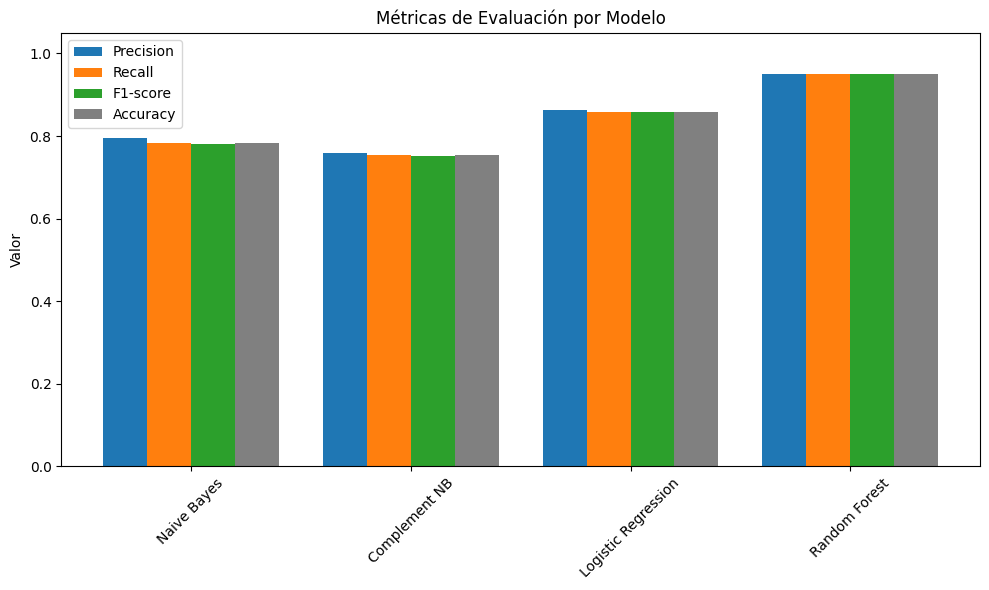

<Figure size 640x480 with 0 Axes>

In [100]:
plot_model_metrics(resultados)

In [49]:
# Make manual predictions with the best model
model_name = 'Random Forest'
model = resultados[model_name]['modelo']

text_to_predict = "I love this product! It's amazing. Fuck you all, I hate this"

text_to_predict_clean = limpiar_texto(text_to_predict)
text_to_predict_vec = vectorizer.transform([text_to_predict_clean])
predicted_class = model.predict(text_to_predict_vec)[0]
predicted_proba = max(model.predict_proba(text_to_predict_vec)[0])
predicted_class, predicted_proba

('Negative', np.float64(0.41046848935890173))

In [50]:
df_val

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content,Word Count,Clean Word Count
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...,47,22
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,16,14
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,17,7
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,13,8
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,25,12
...,...,...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...,47,24
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...,46,25
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...,24,13
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins,8,6


## Predict over Dataset and evaluate labels

In [51]:
df_train.shape

(74682, 7)

In [52]:
# Transformar los datos de entrenamiento con el vectorizador
X = vectorizer.transform(df_train['Clean Tweet content'])

# Calcular las predicciones
df_train['y_pred'] = model.predict(X)

# Calcular las probabilidades para cada etiqueta
df_train['y_pred_proba'] = np.max(model.predict_proba(X), axis=1)

df_train['correct'] = df_train['sentiment'] == df_train['y_pred']

In [53]:
df_incorrect = df_train[df_train['correct'] == False]

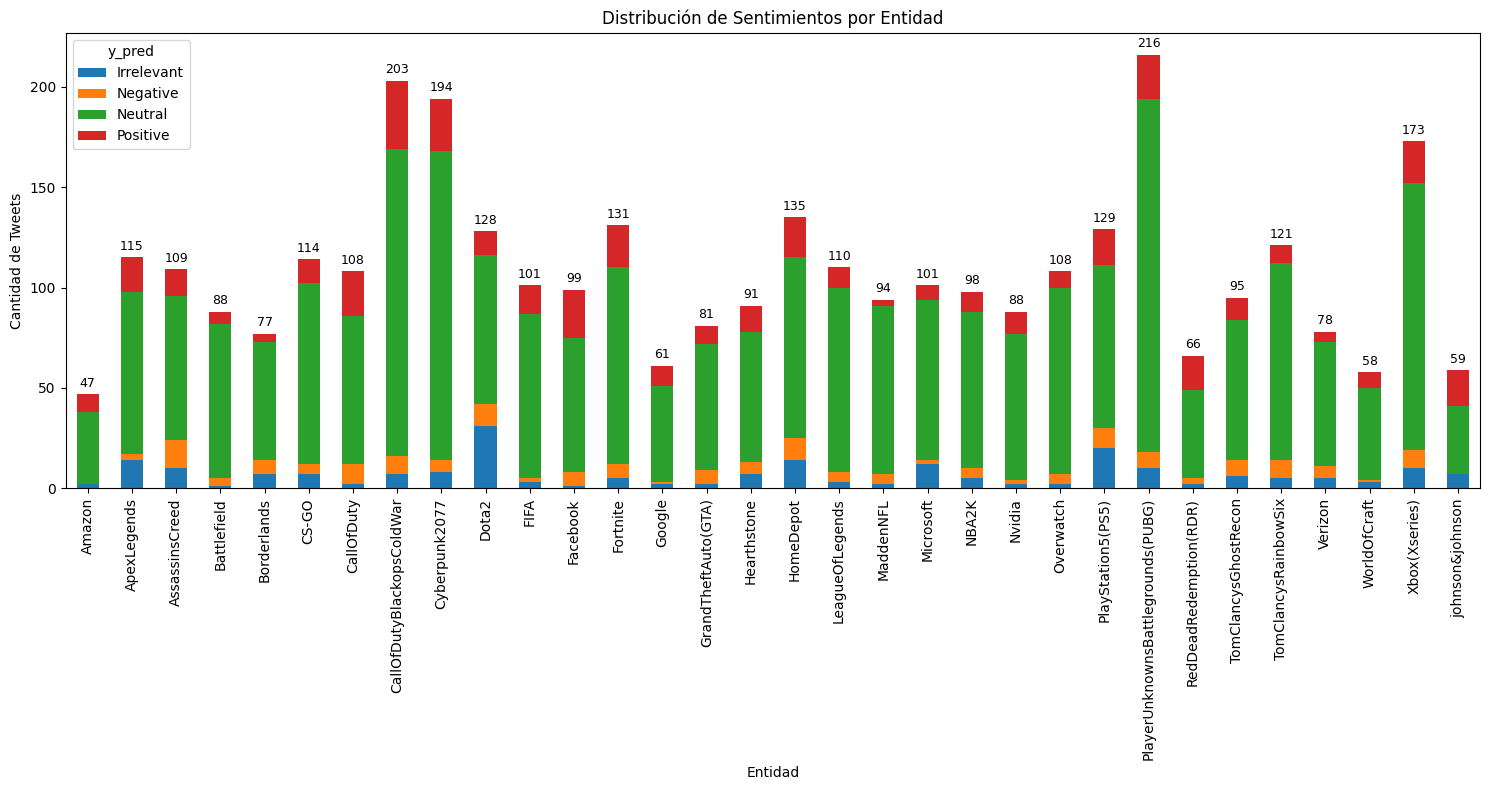

y_pred                             Irrelevant  Negative  Neutral  Positive
entity                                                                    
Amazon                                      2         0       36         9
ApexLegends                                14         3       81        17
AssassinsCreed                             10        14       72        13
Battlefield                                 1         4       77         6
Borderlands                                 7         7       59         4
CS-GO                                       7         5       90        12
CallOfDuty                                  2        10       74        22
CallOfDutyBlackopsColdWar                   7         9      153        34
Cyberpunk2077                               8         6      154        26
Dota2                                      31        11       74        12
FIFA                                        3         2       82        14
Facebook                 

In [54]:
plot_word_count_distribution(df_incorrect, y_column='y_pred')

C:\Users\kevinha\AppData\Local\Temp\ipykernel_90720\3852715872.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_labels)


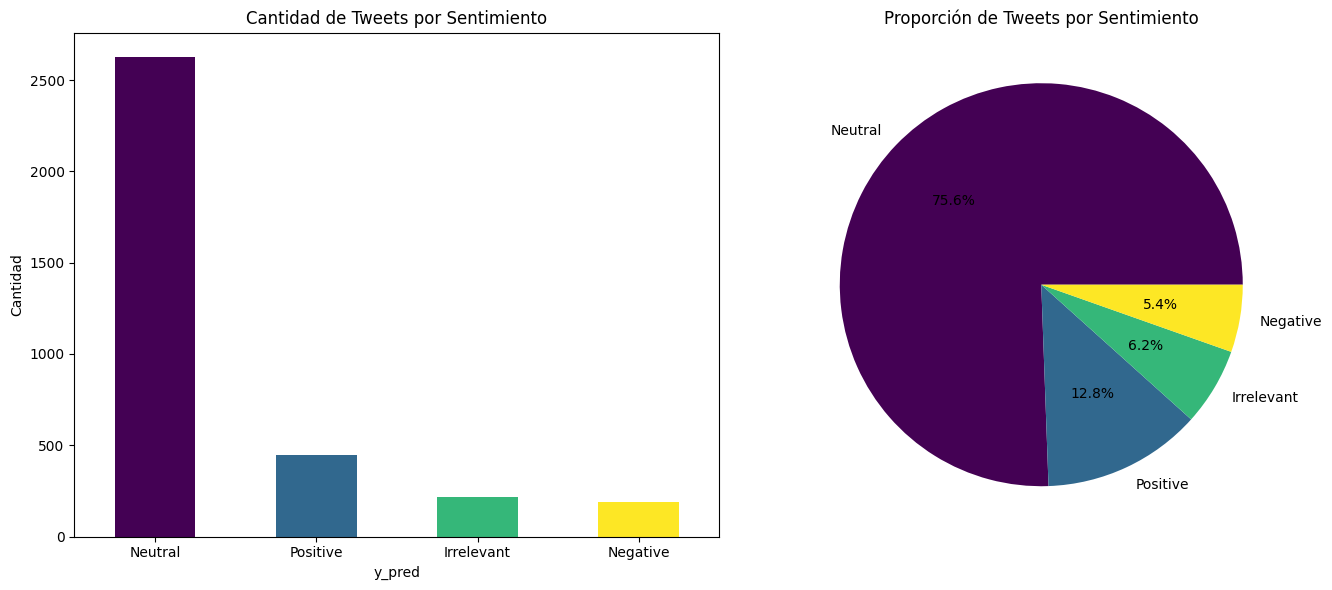

In [55]:
plot_word_count_distribution_pie(df_incorrect, y_column='y_pred')

In [56]:
n_sample = 5
df_aux = df_incorrect[df_incorrect['sentiment'] == 'Positive']

for row in df_aux.sample(n=n_sample).iterrows():
    print(f"Tweet: {row[1]['Tweet content']}")
    print(f"Tweet limpio: {row[1]['Clean Tweet content']}")
    print(f"Sentimiento real: {row[1]['sentiment']}")
    print(f"Predicción: {row[1]['y_pred']} (Probabilidad: {row[1]['y_pred_proba']:.2f})")
    
    print("\n")
    

Tweet: nan
Tweet limpio: nan
Sentimiento real: Positive
Predicción: Neutral (Probabilidad: 0.31)


Tweet: . i love making it
Tweet limpio: love making
Sentimiento real: Positive
Predicción: Irrelevant (Probabilidad: 0.49)


Tweet: we needed that.
Tweet limpio: needed
Sentimiento real: Positive
Predicción: Irrelevant (Probabilidad: 0.83)


Tweet: nan
Tweet limpio: nan
Sentimiento real: Positive
Predicción: Neutral (Probabilidad: 0.31)


Tweet:  
Tweet limpio: 
Sentimiento real: Positive
Predicción: Neutral (Probabilidad: 0.28)




In [57]:
df_incorrect[df_incorrect['y_pred_proba'] > 0.8]

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content,Word Count,Clean Word Count,y_pred,y_pred_proba,correct
84,2415,Borderlands,Positive,FUCK YESSSSSSSS .,fuck yessssssss,3,2,Negative,0.897602,False
86,2415,Borderlands,Positive,FUCK YESSSSSSSS.,fuck yessssssss,2,2,Negative,0.897602,False
87,2415,Borderlands,Positive,FUCK YESSSSSSSS<unk>,fuck yessssssssunk,2,2,Negative,0.897602,False
88,2415,Borderlands,Positive,A FUCK... YESSSSSSSS.,fuck yessssssss,3,2,Negative,0.897602,False
89,2415,Borderlands,Positive,FUCK YOU.,fuck,2,1,Negative,0.897602,False
...,...,...,...,...,...,...,...,...,...,...
68798,3780,Cyberpunk2077,Irrelevant,Your Hell behaves suspiciously?.,hell behaves suspiciously,4,3,Negative,0.853009,False
71421,11033,TomClancysGhostRecon,Neutral,While it's worth that,worth,4,1,Positive,0.836717,False
71552,11057,TomClancysGhostRecon,Negative,I support it. It's a no-brainer for me.,support nobrainer,8,2,Positive,0.813059,False
73472,8985,Nvidia,Neutral,@ VixmKalabi This is a more sensible trajector...,vixmkalabi sensible trajectory pam nvidia,12,5,Positive,0.806636,False


C:\Users\kevinha\AppData\Local\Temp\ipykernel_90720\1892863812.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


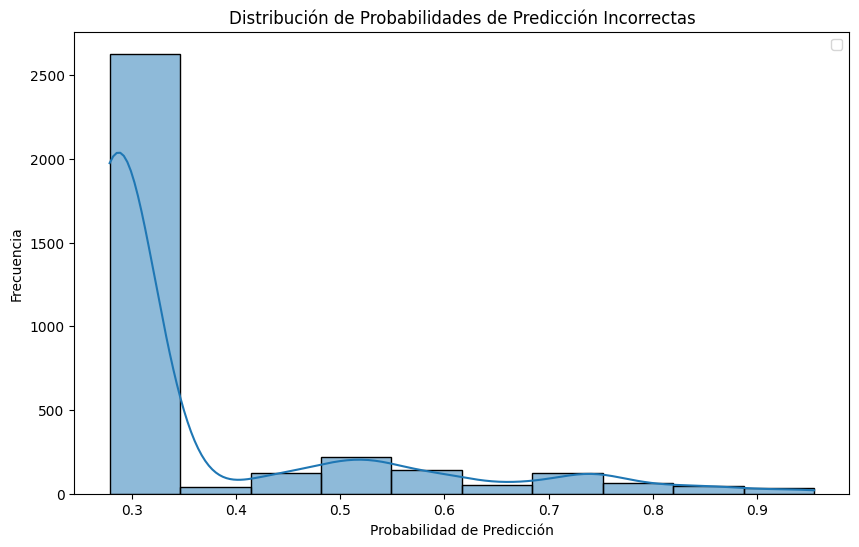

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df_incorrect['y_pred_proba'], bins=10, kde=True)
plt.title('Distribución de Probabilidades de Predicción Incorrectas')
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(f'{images_path}/Distribution_Probabilities_Incorrect.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
df_train

,Tweet ID,entity,sentiment,Tweet content,Clean Tweet content,Word Count,Clean Word Count,y_pred,y_pred_proba,correct
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,11,4,Positive,0.970000,True
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,12,3,Positive,0.692216,True
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,10,4,Positive,0.910000,True
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,10,4,Positive,0.950000,True
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,12,4,Positive,0.970000,True
...,...,...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...,26,11,Positive,0.960000,True
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...,23,11,Positive,0.950000,True
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...,25,11,Positive,0.960000,True
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...,32,14,Positive,0.850000,True


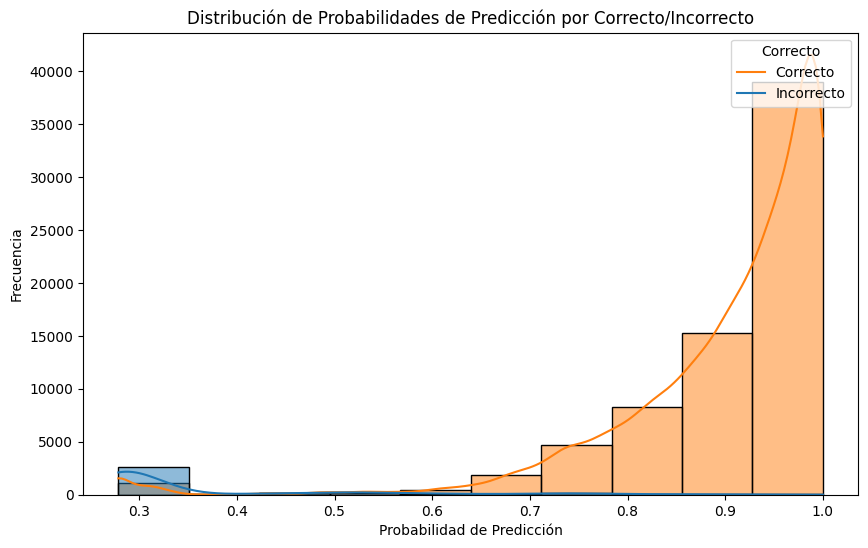

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='y_pred_proba', bins=10, kde=True, hue='correct')
plt.title('Distribución de Probabilidades de Predicción por Correcto/Incorrecto')
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Frecuencia')
plt.legend(title='Correcto', loc='upper right', labels=['Correcto','Incorrecto'])
plt.savefig(f'{images_path}/Distribution_Probabilities_Predicted_Class.png', dpi=300, bbox_inches='tight')
plt.show()
